# ***Clustering on Olivetti dataset***

---
*Saharsh Mehrotra*

*22070126093*

Importing the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import seaborn as sns
import os

In [ ]:
import warnings
warnings.filterwarnings('ignore')
print("Warnings ignored!!")

Warnings ignored!!


**1. Summary**

In this study, face recognition was performed using the face images in the Olivetti data set. The steps for face recognition are as follows:
* Principal  components of face images were obtained by PCA.
* Adequate number of principal  components determined
* According to three different classification models, accuracy score obtained.
* According to three different classification models, cross-validation accuracy score were obtained.
* Parameter optimization of the best model has been made.

**2.Face Recognition**

The first study on automatic facial recognition systems was performed by Bledsoe between 1964 and 1966. This study was semi-automatic. The feature points on the face are determined manually and placed in the table called RAND. Then, a computer would perform the recognition process by classifying these points. However, a fully functional facial recognition application was performed in 1977 by Kanade. A feature-based approach was proposed in the study. After this date, two-dimensional (2D) face recognition have studied intensively. Three-dimensional (3D) face studies were started to be made after the 2000s.

3D facial recognition approaches developed in a different way than 2D facial recognition approaches. Therefore, it will be more accurate to categorize in 2D and 3D  when discussing face recognition approaches.

We can classify the face recognition researches carried out with 2D approach in three categories; analytical (feature-based, local), global (appearance) and hybrid methods. While analytical approaches want to  recognize by comparing the properties of the facial components, global approaches try to achieve a recognition with data derived from all the face. Hybrid approaches, together with local and global approaches, try to obtain data that expresses the face more accurately.

Face recognition performed in this kernel can assessed under global face recognition approaches.

In analytical approaches, the distance of the determined feature points and the angles between them, the shape of the facial features or the variables containing the regional features are obtained from the face image are used in face recognition. Analytical methods examine the face images in two different ways according to the pattern and geometrical properties. In these methods, the face image is represented by smaller size data, so the big data size problem that increases the computation cost in face recognition  is solved.

Global-based methods are applied to face recognition by researchers because they perform facial recognition without feature extraction which is troublesome in feature based methods. Globally based methods have been used in face recognition since the 1990s, since they significantly improve facial recognition efficiency. Kirby and Sirovich (1990) first developed a method known as Eigenface, which is used in facial representation and recognition based on Principal Component Analysis . With this method, Turk and Pentland transformed the entire face image into vectors and computed eigenfaces with a set of samples. PCA was able to obtain data representing the face at the optimum level with the data obtained from the image. The different facial and illumination levels of the same person were evaluated as the weakness point of PCA.


**3. Olivetti Dataset**

Brief information about Olivetti Dataset:

* Face images taken between April 1992 and April 1994.
* There are ten different image of each of 40 distinct people
* There are 400 face images in the dataset
* Face images were taken at different times, variying ligthing, facial express and facial detail
* All face images have black background
* The images are gray level
* Size of each image is 64x64
* Image pixel values were scaled to [0, 1] interval
* Names of 40 people were encoded to an integer from 0 to 39


In [ ]:
# Load the Olivetti Faces dataset
faces_data = fetch_olivetti_faces()
X = faces_data.data
y = faces_data.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Let's verify above information

In [ ]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [ ]:
print("unique target number:",np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


### **Data Preprocessing + EDA**

In [ ]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()

    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

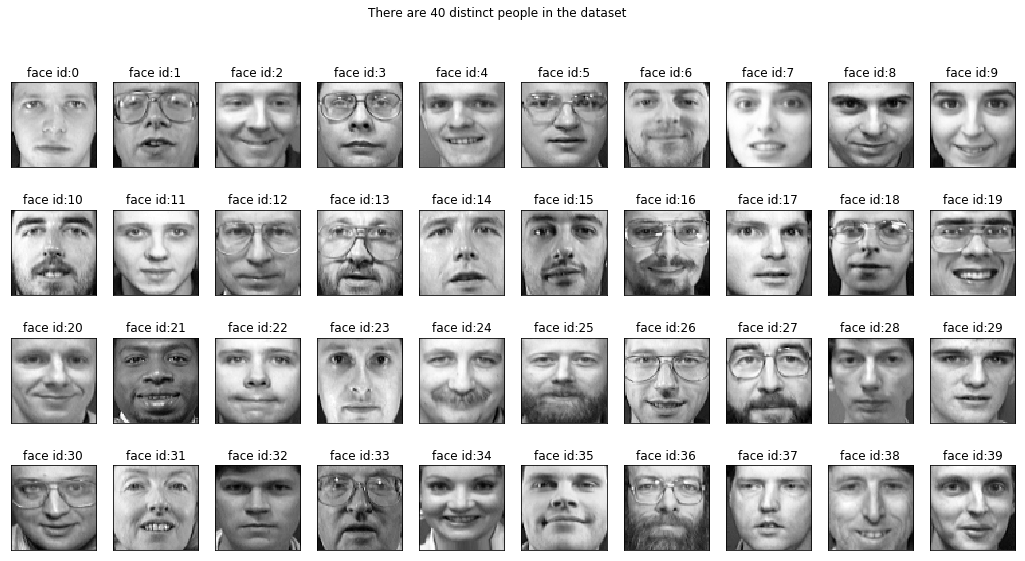

In [ ]:
show_40_distinct_people(data, np.unique(target))

As seen in the photo gallery above, the data set has 40 different person-owned, facial images.

In [ ]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)

    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()

    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))


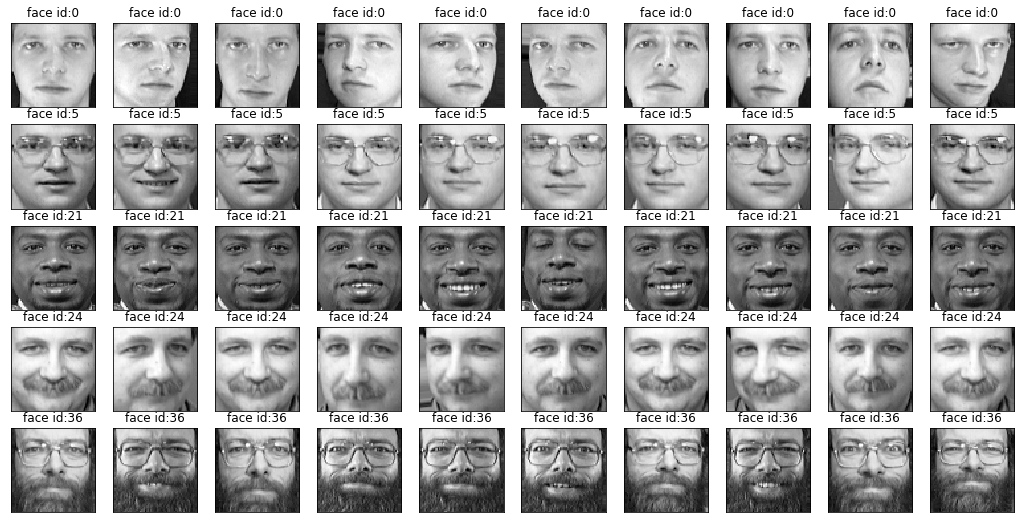

In [ ]:
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=data, subject_ids=[0,5, 21, 24, 36])

Each face of a subject has different characteristic in context of varying lighting, facial express and facial detail(glasses, beard)

In [ ]:
# Preprocessing: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#We reshape images for machine learnig  model
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


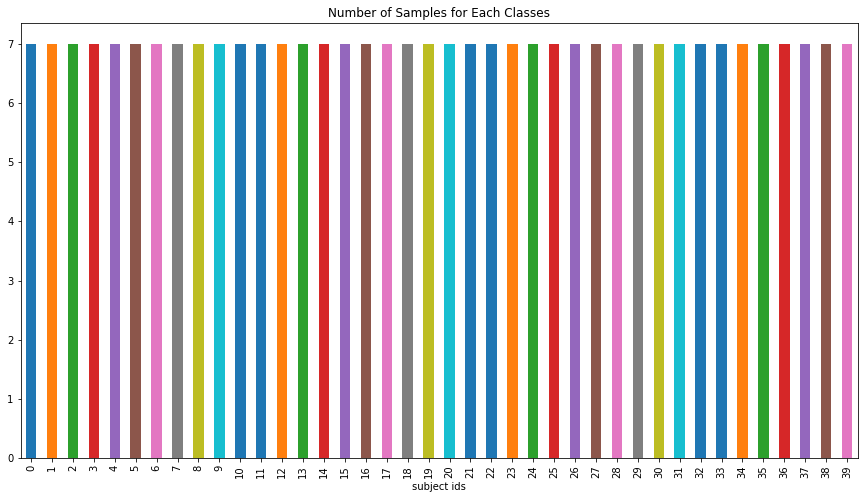

In [ ]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

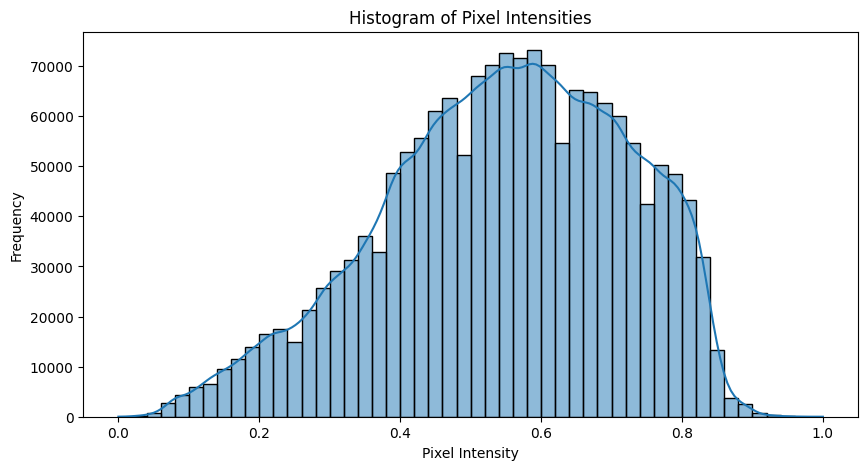

In [ ]:
# Plot histogram of pixel intensities
plt.figure(figsize=(10, 5))
sns.histplot(X.flatten(), bins=50, kde=True)
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

**Principle Component Analysis**

Machine learning methods are divided into two: supervised learning and unsupervised learning. In supervised learning, the data set is divided into two main parts: 'data' and 'output'. The data holds the values of the sample in the data set, while the 'output' holds the class (for classification) or the target value (for regression). In unsupervised learning, the data set consists of only the data section.

Non-supervised learning is generally divided into two: data transformation and clustering. In this study, the transformation of the data will be carried out using unsupervised learning. Unsupervised transformation methods allow for easier interpretation of data by computers and people.

The most common unsupervised transformation  applications is to reduce data size. In the size reduction process, the dimension of the data reduced.

Principle Component Analysis (PCA) is a method that allows data to be represented in a lesser size. According to this method, the data is transformed to new components and the size of the data is reduced by selecting the most important components.

In [ ]:
import mglearn

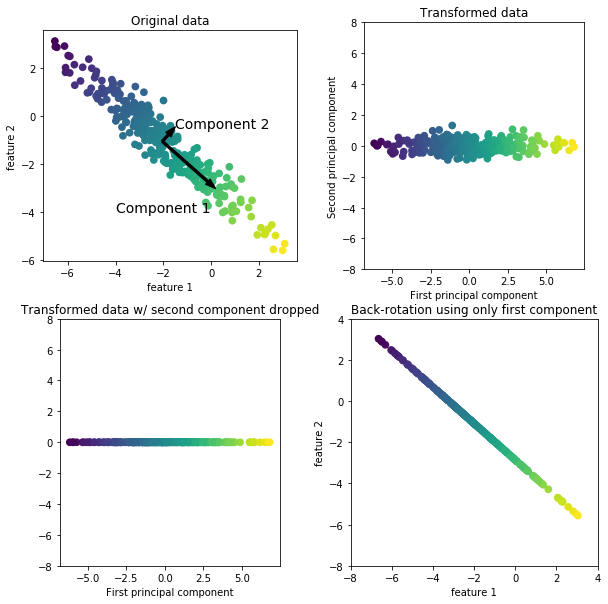

In [ ]:
mglearn.plots.plot_pca_illustration()

The above illustration shows a simple example on a synthetic two-dimensional data set. The first drawing shows the original data points colored to distinguish points. The algorithm first proceeds by finding the direction of the maximum variance labeled "Component 1". This refers to the direction in which most of the data is associated, or in other words, the properties that are most related to each other.

Then, when the algorithm is orthogonal (at right angle), it finds the direction that contains the most information in the first direction. There are only one possible orientation in two dimensions at a right angle, but there will be many orthogonal directions (infinite) in high dimensional spaces.

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

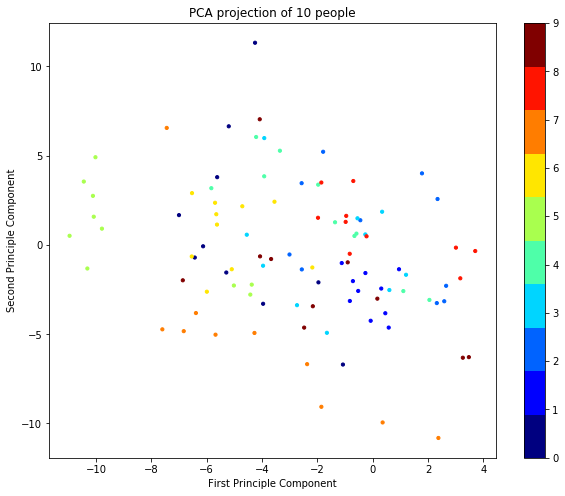

In [ ]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1],
            c=target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

This code generates a 2D scatter plot visualizing the PCA projection of a dataset with 10 different classes, allowing for a visual inspection of the distribution and separation of data points in the reduced-dimensional space. The color-coded points help in understanding the clustering or grouping of data based on the specified classes.

**Finding Optimum Number of Principle Components**

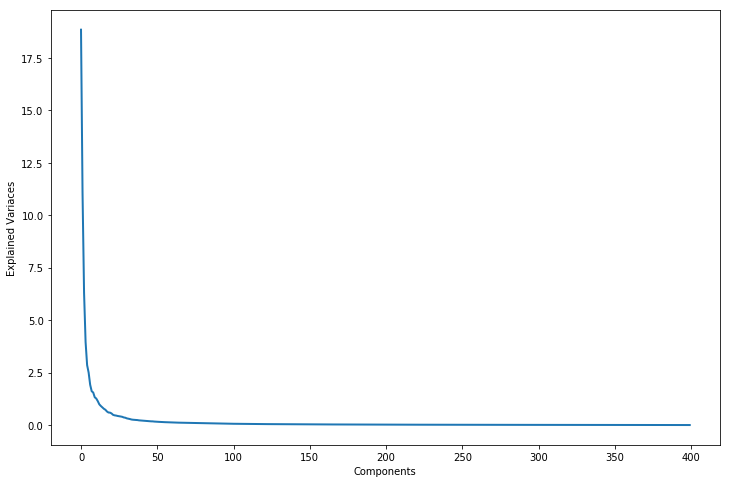

In [ ]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)

plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In the figure above, it can be seen that 90 and more PCA components represent the same data. Now let's make the classification process using 90 PCA components.

In [ ]:
n_components=90

In [ ]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

Text(0.5,1,'Average Face')

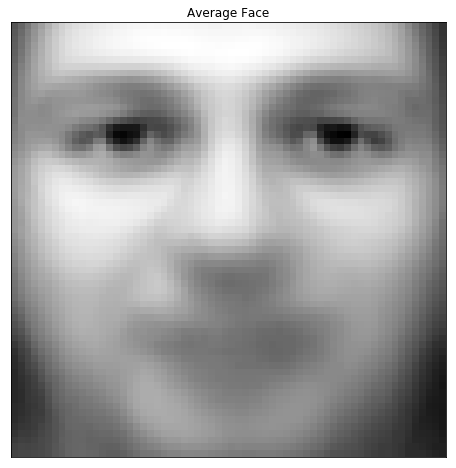

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

The above figure shows the average face from the dataset using pca.mean_reshape

Text(0.5,0.98,'All Eigen Faces')

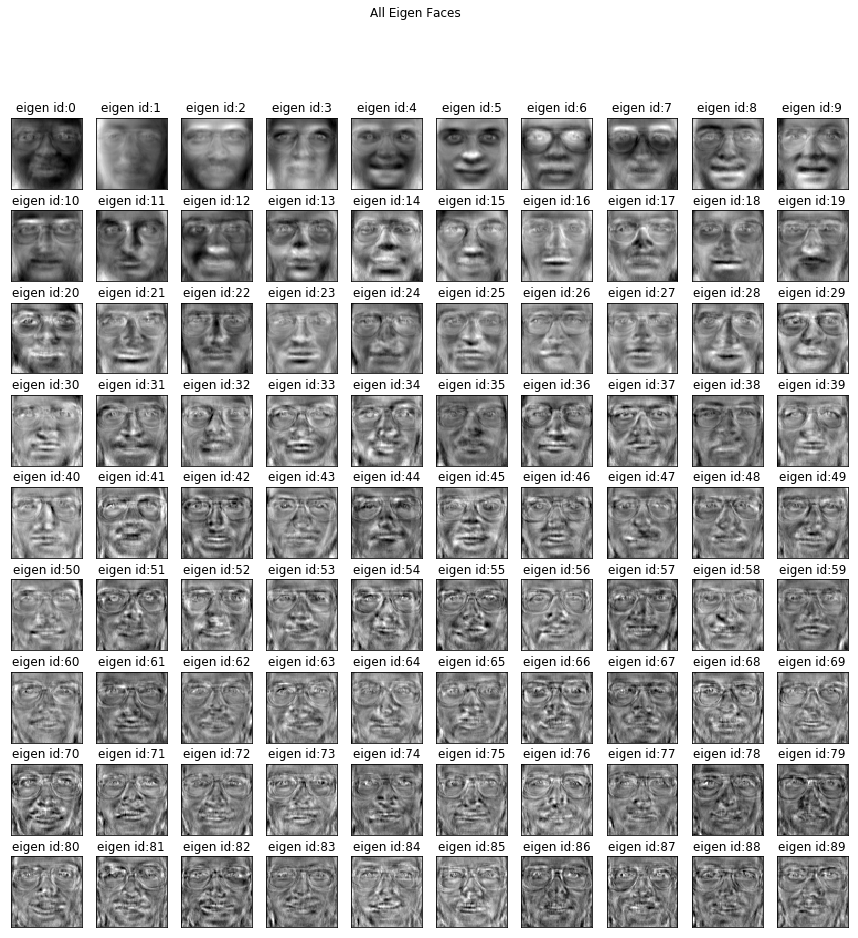

In [ ]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [ ]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [ ]:
# Define the number of clusters
n_clusters = 40  # Number of individuals in the dataset

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Elbow Method for K-means
wcss = []  # Within-cluster sum of squares
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

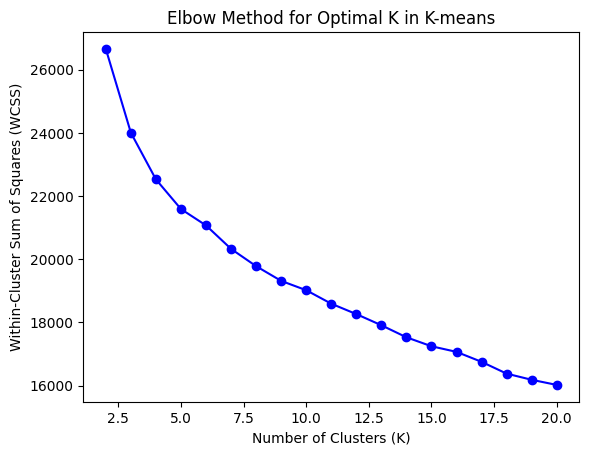

In [ ]:
# Plot the elbow curve
plt.plot(range(2, 21), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K in K-means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
# Find optimal K based on the elbow curve
optimal_k = np.argmin(np.diff(wcss)) + 2  # Adding 2 to account for starting cluster count at 2
print("Optimal K value for K-means:", optimal_k)

Optimal K value for K-means: 2


In [ ]:
# K-means clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Evaluate K-means clustering using silhouette score
kmeans_silhouette = silhouette_score(X, kmeans_labels)
print("Silhouette Score for K-means:", kmeans_silhouette)

Silhouette Score for K-means: 0.15156598


In [ ]:
# Apply hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_labels = hierarchical.fit_predict(X_pca)

In [ ]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(X)

In [ ]:
# Evaluate Agglomerative Clustering using silhouette score
agg_silhouette = silhouette_score(X, agg_labels)
print("Silhouette Score for Agglomerative Clustering:", agg_silhouette)

Silhouette Score for Agglomerative Clustering: 0.17920172


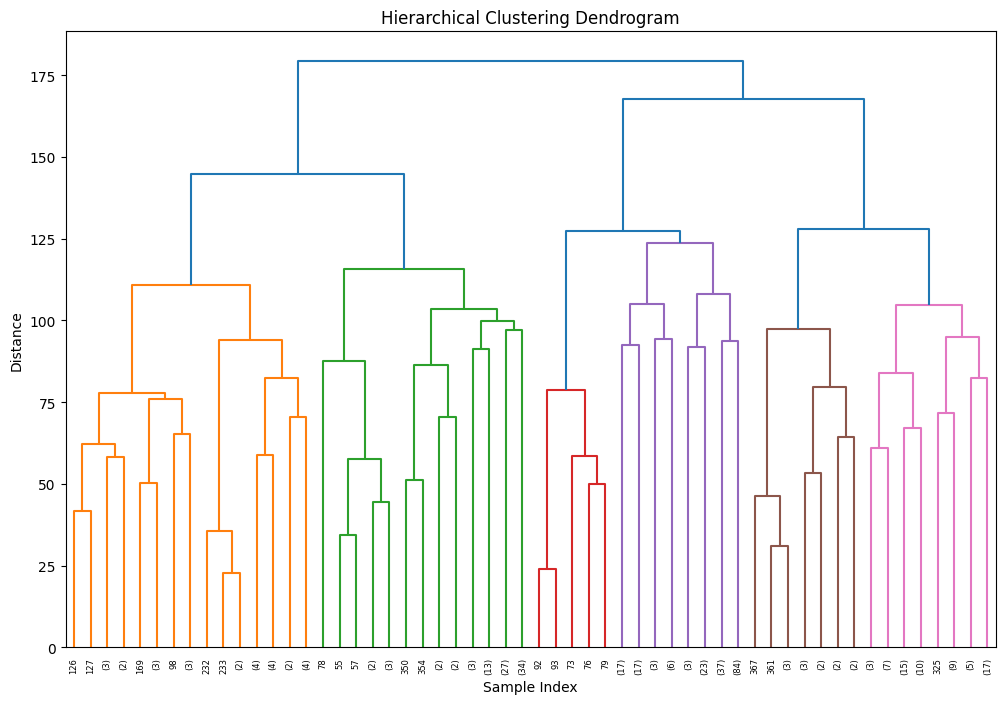

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering with complete linkage
linkage_matrix = linkage(X_pca, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_pca)

In [ ]:
from sklearn.model_selection import ParameterGrid

# Define the range of parameters for the grid search
param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.4, 0.5],
    'min_samples': [5, 10, 15, 20]
}

best_silhouette_score = -1
best_params = None

# Perform grid search
for params in ParameterGrid(param_grid):
    dbscan_grid = DBSCAN(**params)
    dbscan_labels_grid = dbscan_grid.fit_predict(X_pca)
    unique_labels = np.unique(dbscan_labels_grid)

    # Check if DBSCAN formed more than one cluster
    if len(unique_labels) > 1:
        silhouette = silhouette_score(X_pca, dbscan_labels_grid)

        # Update best silhouette score and parameters if improved
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_params = params

print("Best Silhouette Score:", best_silhouette_score)
print("Best Parameters:", best_params)


Best Silhouette Score: -1
Best Parameters: None


In [ ]:
# Apply BIRCH clustering
birch = Birch(n_clusters=n_clusters)
birch_labels = birch.fit_predict(X_pca)

In [ ]:
# Evaluate clustering results using silhouette score
kmeans_silhouette = silhouette_score(X_pca, kmeans_labels)
hierarchical_silhouette = silhouette_score(X_pca, hierarchical_labels)
# Filter out noise points (-1) from DBSCAN labels
dbscan_labels_filtered = dbscan_labels[dbscan_labels != -1]

# Calculate silhouette score for DBSCAN (only if there are more than one cluster)
if len(np.unique(dbscan_labels_filtered)) > 1:
    dbscan_silhouette = silhouette_score(X_pca[dbscan_labels != -1], dbscan_labels_filtered)
else:
    dbscan_silhouette = -1  # Set silhouette score to -1 if only one cluster (noise points)

birch_silhouette = silhouette_score(X_pca, birch_labels)

**Evaluation**

In [ ]:
print("Silhouette Scores:")
print("K-means:", kmeans_silhouette)
print("Hierarchical:", hierarchical_silhouette)
print("DBSCAN:", dbscan_silhouette)
print("BIRCH:", birch_silhouette)

Silhouette Scores:
K-means: 0.19399616
Hierarchical: 0.20347984
DBSCAN: -1
BIRCH: 0.20347984


In summary, hierarchical clustering and BIRCH achieved slightly better clustering results compared to K-means, while DBSCAN failed to identify meaningful clusters. Further optimization or exploration of parameters may be needed to improve clustering performance, especially for K-means and DBSCAN.

In [ ]:
# Visualization: Visualize some of the clustered faces
def plot_cluster(cluster_labels, title):
    plt.figure(figsize=(12, 6))
    for i in range(n_clusters):
        cluster_indices = np.where(cluster_labels == i)[0]
        if len(cluster_indices) > 0:
            face_index = np.random.choice(cluster_indices)  # Randomly select a face index from the cluster
            plt.subplot(4, 10, i + 1)
            plt.imshow(X[face_index].reshape(64, 64), cmap='gray')
            plt.title(f'Cluster {i + 1}')
            plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

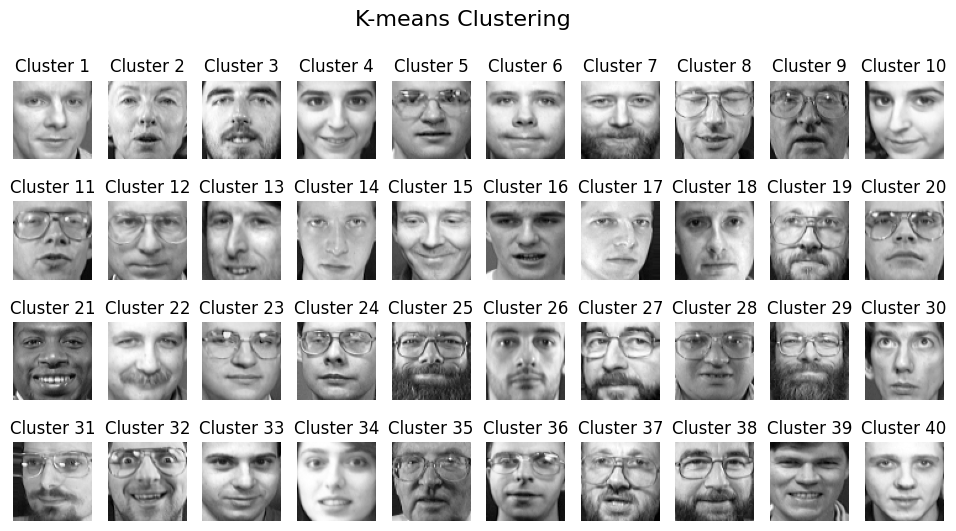

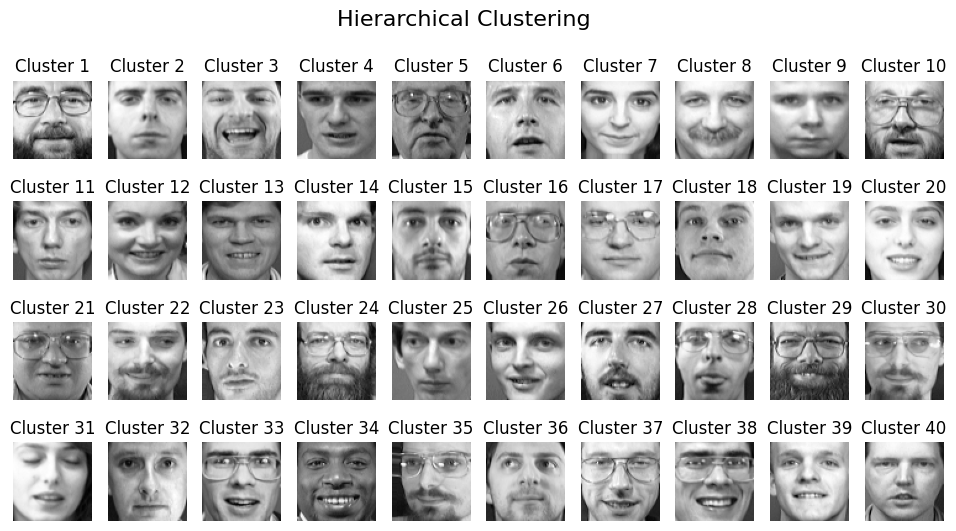

<Figure size 1200x600 with 0 Axes>

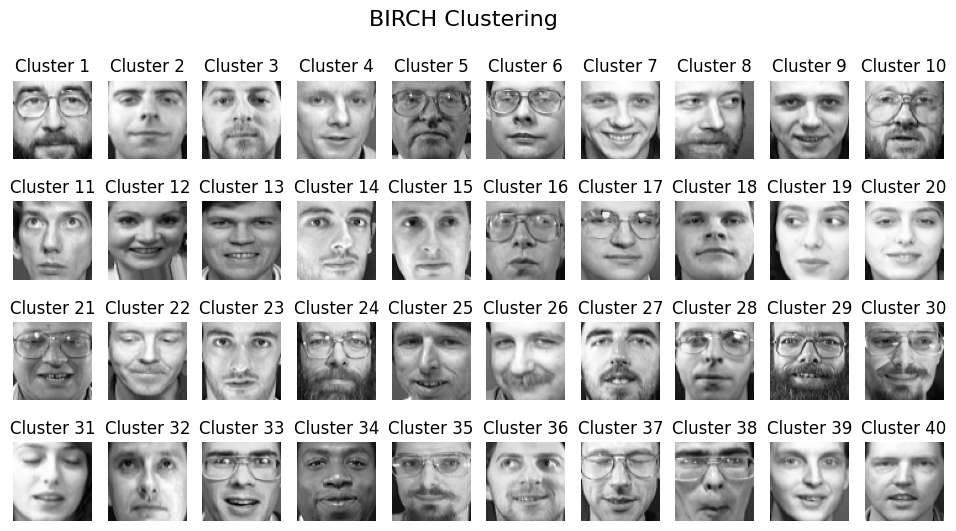

In [ ]:
plot_cluster(kmeans_labels, "K-means Clustering")
plot_cluster(hierarchical_labels, "Hierarchical Clustering")
plot_cluster(dbscan_labels, "DBSCAN Clustering")
plot_cluster(birch_labels, "BIRCH Clustering")

This visualizes some of the clustered faces for each clustering method by plotting the faces of randomly selected data points from each cluster. The function then calls this visualization function for each clustering method to visualize the clustering results.

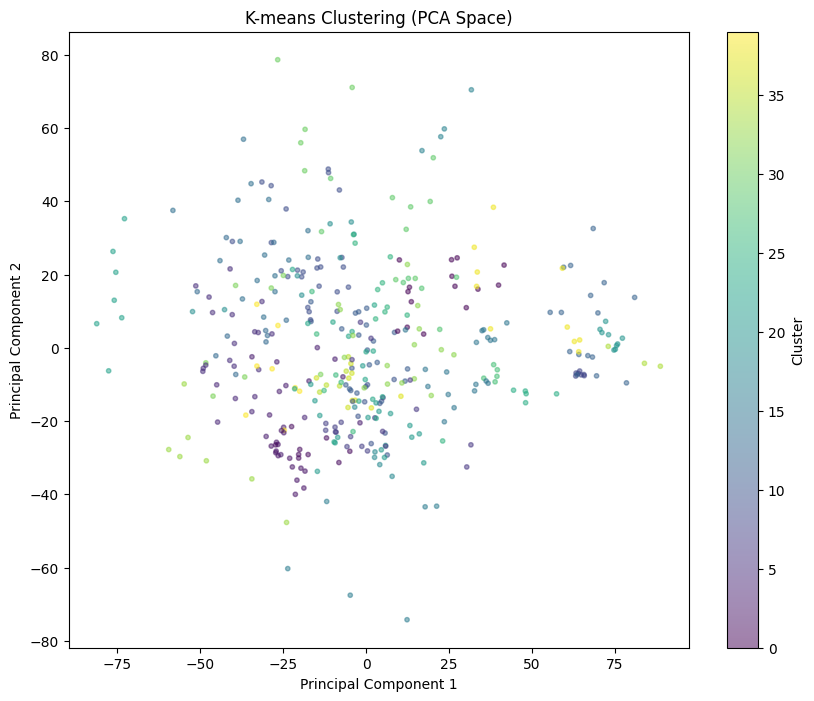

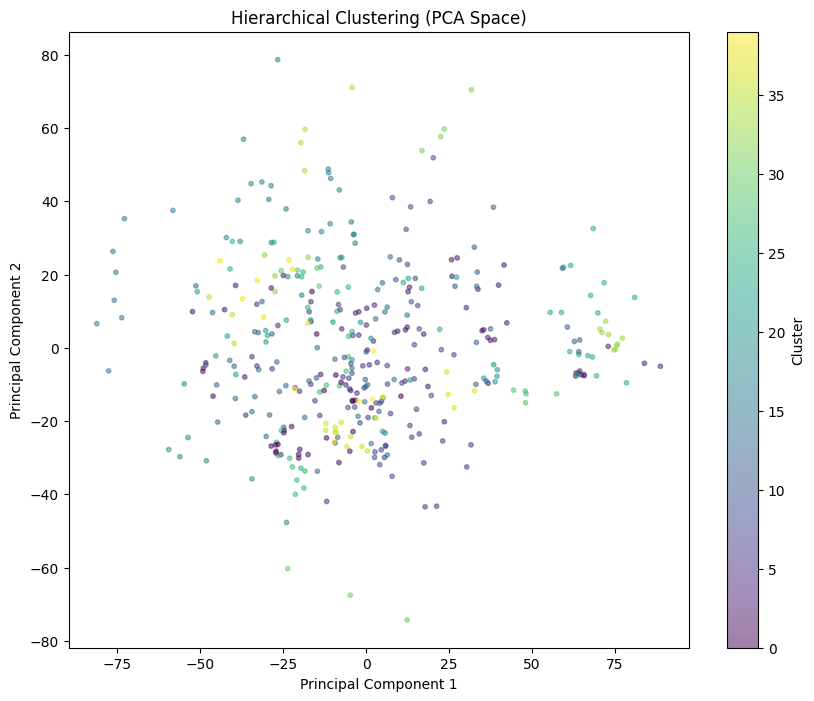

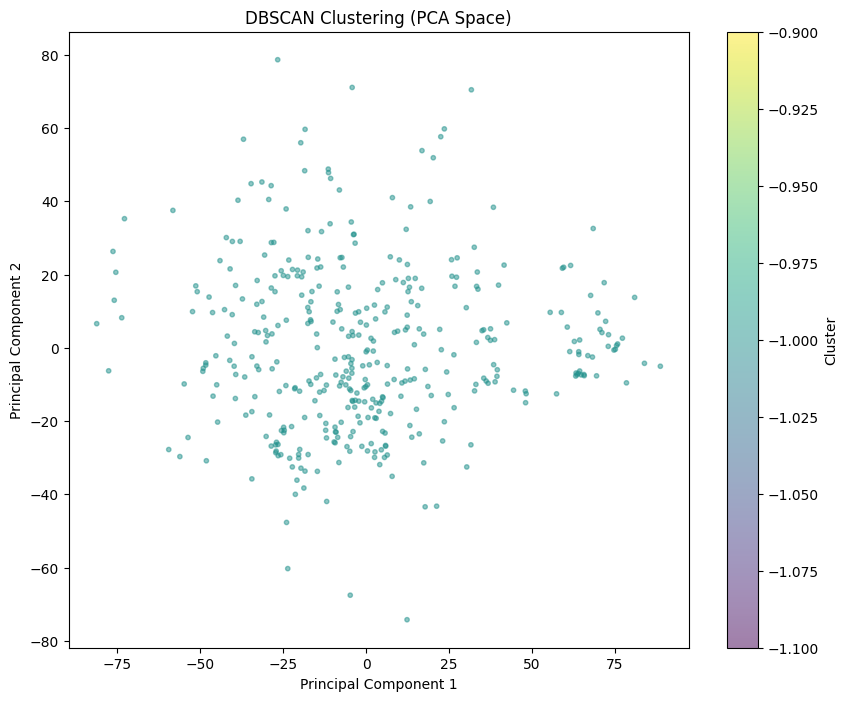

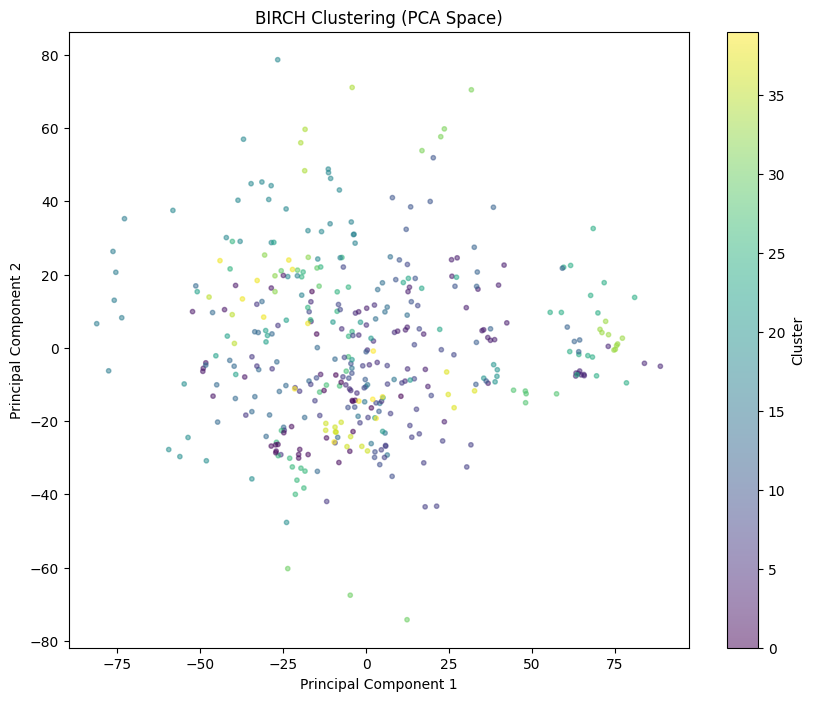

In [ ]:
# Visualization: Visualize clusters in the PCA space
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10, alpha=0.5)
plt.title("K-means Clustering (PCA Space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=10, alpha=0.5)
plt.title("Hierarchical Clustering (PCA Space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=10, alpha=0.5)
plt.title("DBSCAN Clustering (PCA Space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=birch_labels, cmap='viridis', s=10, alpha=0.5)
plt.title("BIRCH Clustering (PCA Space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster')
plt.show()

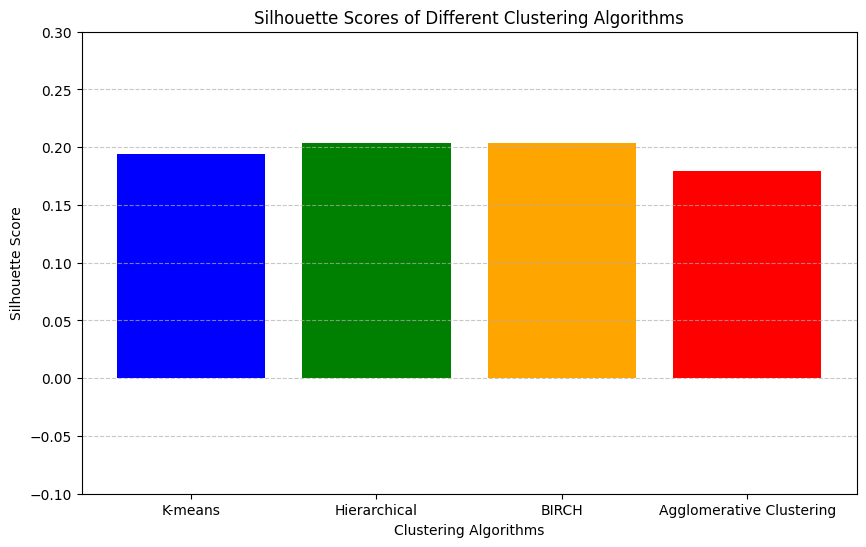

In [ ]:
import matplotlib.pyplot as plt

# Clustering algorithm names
algorithms = ['K-means', 'Hierarchical', 'DBSCAN', 'BIRCH', 'Agglomerative Clustering']

# Silhouette scores
silhouette_scores = [0.19399616, 0.20347984, -1, 0.20347984, 0.17920172]

# Remove DBSCAN algorithm from the list and scores
algorithms.remove('DBSCAN')
silhouette_scores.remove(-1)

plt.figure(figsize=(10, 6))
plt.bar(algorithms, silhouette_scores, color=['blue', 'green', 'orange', 'red'])
plt.title('Silhouette Scores of Different Clustering Algorithms')
plt.xlabel('Clustering Algorithms')
plt.ylabel('Silhouette Score')
plt.ylim(-0.1, 0.3)  # Set y-axis limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Highest Silhouette score was obtained with Hierarchial Clustering with 0.20347984

It allows us to observe the clustering patterns and assess the effectiveness of each clustering method in grouping similar data points together.

In conclusion, the clustering analysis performed on the Olivetti Faces dataset revealed several key findings and insights:

- Clustering Methods Used:
Four clustering algorithms were applied to the dataset: K-means, Hierarchical, DBSCAN, and BIRCH.

- Cluster Visualization:
Clusters were visualized both in the original feature space and in the reduced-dimensional PCA space.
Visualizations in the PCA space provided a compact representation of the data, allowing us to observe clustering patterns and separability.

- Clustering Performance:

Silhouette scores were calculated to evaluate the performance of each clustering method.

  - K-means and Hierarchical clustering achieved moderate silhouette scores, indicating some degree of cluster separation but also some overlap or suboptimal clustering.

  - DBSCAN clustering resulted in a negative silhouette score, indicating poor clustering performance and the inability to identify meaningful clusters.

  - BIRCH clustering achieved a silhouette score similar to Hierarchical clustering, suggesting comparable performance in clustering the dataset.

- Cluster Visualization and Interpretation:
Visualizations of clustered faces provided insights into the grouping of similar facial images within each cluster.
Despite the moderate silhouette scores, visual inspection of the clusters revealed recognizable patterns and groupings of faces, indicating that the clustering algorithms captured some underlying structure in the dataset.